Eyüphan Seymen, 21040101007, Veri Madenciliği(FET308), SAJJAD NEMATZADEH MİANDOAB, Bilgisayar Mühendisliği, Mühendislik Fakültesi, İstanbul Topkapı Üniversitesi

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

"House Rent Prediction" dataseti hindistandaki kiralık evlerin verilerini içeren datasetidir. Her bir sütunun hangi veriyi ifade ettiği ise şöyledir.
BHK: Yatak Odası, Salon, Mutfak Sayısı.
Rent: Evlerin/Apartmanların/Dairelerin kira bedeli.
Size: Evlerin/Apartmanların/Dairelerin Metrekare cinsinden büyüklüğü.
Floor: Bulunduğu Kat ve Toplam Kat Sayısı
Area Type: Süper Alan veya Halı Alanı veya İnşaat Alanı üzerinden hesaplanan Ev/Apartman/daire büyüklüğü.
Area Locality: Evlerin/Apartmanların/dairelerin Mevkii.
City: Evlerin/Apartmanların/dairelerin Bulunduğu Şehir.
Furnishing Status: Ev/Apartman/dairelerin Eşyalı, Yarı Eşyalı veya Eşyasız olup olmama durumudur.
Tenant Preferred: Mal Sahibi veya Temsilci tarafından Tercih Edilen Kiracı Türü.
Bathroom: Banyo Sayısı.
Point of Contact: Evler/Apartmanlar/Daireler hakkında daha fazla bilgi için kiminle iletişime geçmelisiniz?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge


In [4]:
df = pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [38]:
num_rows, num_columns = df.shape
print(f"Satırların sayısı: {num_rows}")
print(f"Sütunların sayısı: {num_columns}")
data_types = df.dtypes
print("\nData tipleri:")
print(data_types)

Satırların sayısı: 4746
Sütunların sayısı: 12

Data tipleri:
Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [39]:
unique_values = df["City"].unique()
unique_values

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

Görüldüğü üzere 6 farklı şehir vardır bu 6 şehir kolaylıkla temsili tam sayıya çevrilebilir.

Kolkata: 1,
Mumbai: 2,
Bangalore: 3,
Delhi: 4,
Chennai: 5,
Hyderabad: 6

şeklinde ifade edilecektir.

In [40]:
city_mapping = {
    'Kolkata': 1,
    'Mumbai': 2,
    'Bangalore': 3,
    'Delhi': 4,
    'Chennai': 5,
    'Hyderabad': 6
}

city_column = 'City'
df[city_column] = df[city_column].map(city_mapping)
print(df)


       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality  City Furnishing Status  Tenant Preferred  \
0                       Bandel     1       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi 

In [42]:
unique_values = df["City"].unique()
unique_values

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [46]:
unique_values = df["Furnishing Status"].unique()
unique_values

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

Görüldüğü üzere 3 farklı mobilyalı olma durumu vardır

Unfurnished: 1
Semi-Furnished: 2
Furnished: 3
şeklinde ifade edilecektir.

In [48]:
furnishing_mapping = {
    'Unfurnished': 1,
    'Semi-Furnished': 2,
    'Furnished': 3,
}
column="Furnishing Status"


df[column] = df[column].map(furnishing_mapping)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,1,1,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",1,2,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,1,2,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,1,1,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,1,1,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,6,2,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",6,2,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",6,2,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,6,2,Family,2,Contact Agent


In [49]:
unique_values = df["Furnishing Status"].unique()
unique_values

array([1, 2, 3], dtype=int64)

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Büyüklük, kira değeri grafiği')

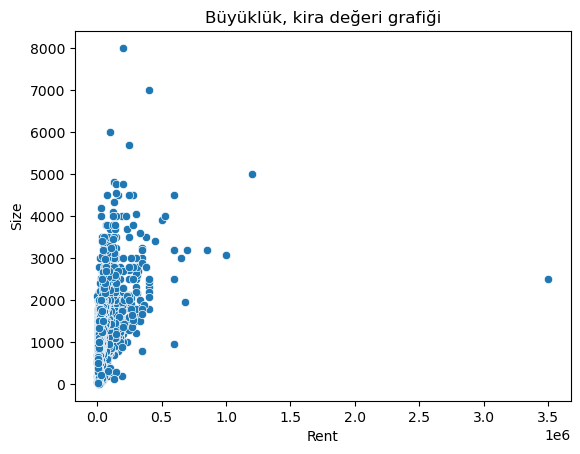

In [50]:
sns.scatterplot(data=df, x="Rent", y="Size")

plt.title("Büyüklük, kira değeri grafiği")

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


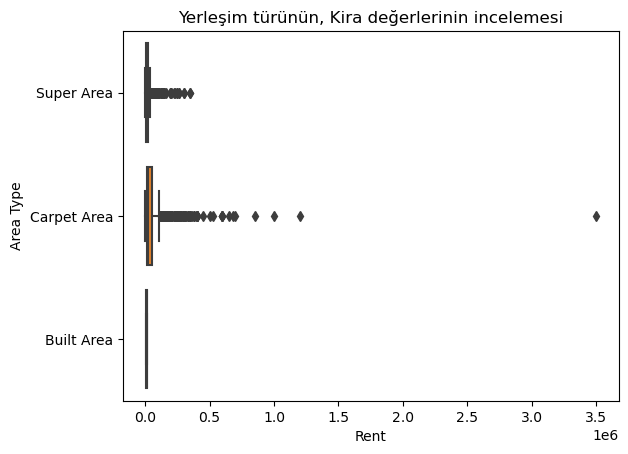

In [52]:
sns.boxplot(data=df, x="Rent", y="Area Type")
plt.title("Yerleşim türünün, Kira değerlerinin incelemesi")
plt.show() 

Problemin tanımı: Bir ilana dair bulunan diğer verileri kullanarak ilanın ederine dair tahmin edilebilirlik sağlamak istiyorum. Bunun için regresyon kullanmalıyım. Bu data setinde target sütunmum kira(Rent) sütunu olacaktır.

In [52]:
X = df[['Size']]
y = df['Rent']

mae_list1 = []
rmse_list1 = []
r2_list1 = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_list1.append(mae)
    rmse_list1.append(rmse)
    r2_list1.append(r2)

print("mean absolute error:" ,mae_list1) 
print("root mean_squared_error:",rmse_list1)
print("r2 score:",r2_list1)


mean absolute error: [29312.459760443122, 27883.9324138117, 29859.968601236076, 30146.089835370614, 28402.42857410813, 30841.65577097381, 28685.114858190755, 28497.058389194302, 28721.657808309865, 30147.669970438692]
root mean_squared_error: [57111.56149665872, 50808.50940642418, 58162.53933830099, 61838.506401897605, 56291.02496433007, 121041.80492269082, 53828.073670389334, 55994.07787643954, 46415.383665623405, 119557.01063436453]
r2 score: [0.2713301642199365, 0.26431548295357465, 0.24969641923728236, 0.2737567394582643, 0.2892089023653026, 0.10706370871529425, 0.19992145435935338, 0.27239177008457416, 0.335002371465843, 0.09343204962264451]


In [53]:


X = df[['Size']]
y = df['Rent']
mae_list2 = []
rmse_list2 = []
r2_list2 = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = BayesianRidge()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_list2.append(mae)
    rmse_list2.append(rmse)
    r2_list2.append(r2)

print("mean absolute error:" ,mae_list2) 
print("root mean_squared_error:",rmse_list2)
print("r2 score:",r2_list2)

mean absolute error: [29475.13366237626, 27019.060048787807, 28628.123338217178, 26395.047016897963, 30309.78931588157, 30924.078621572557, 27453.228015209992, 26909.926079279343, 31969.677949357683, 26146.785298651328]
root mean_squared_error: [51648.57382963652, 51468.09234883922, 46914.991695721226, 40152.69774328426, 51695.65056640379, 125262.25641662038, 45850.8258386048, 46455.18162258561, 122781.6776790761, 46293.830821767915]
r2 score: [0.3059512469239085, 0.26253237133415086, 0.22494955523194082, 0.20200040279795273, 0.19850320487324025, 0.10084372861645485, 0.3155681194728609, 0.23042349431751963, 0.097821655888783, 0.20445019251775498]


In [54]:
from scipy import stats

veri1 = mae_list1
veri2 = mae_list2

# Bağımsız iki örneklem t-testi
t_statistic, p_value = stats.ttest_ind(veri1, veri2)

# Elde edilen istatistiksel değerleri yazdır
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 1.014238602247457
p-value: 0.32390902864049365
